## La bataille de boules de neige


Un étudiant du cours de physique s'engage dans une bataille de boules de neige avec un ami. Cet ami parvient à rattraper les boules et à les renvoyer immédiatement.

L'étudiant sait qu'une boule de neige peut être envoyée à deux angles de tir différents, mais avec la même vitesse, et arriver au même point d'impact. Cependant, les temps de vol sont différents. Aussi, pour gagner la partie, l'étudiant décide de jeter deux boules, à des instants différents, l'une sur une trajectoire supérieure à l'autre. La balle supérieure créera une diversion, pendant que l'ami se préparera à l'attraper, la seconde boule arrivera et les deux balles frapperont simultanément.  Si les amis sont à une distance $L$ l'un de l'autre et qu'ils lancent les boules à une vitesse initiale $v_0$:

1- Quels sont les angles de tir?

2- Combien de temps faut-il attendre avant de jeter la deuxième boule?

3- Application numérique : $L=25$ m et $v_0=20$ m$\cdot$s$^{-1}$.




In [1]:
import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import HTML

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import Arrow, OpenHead, NormalHead, VeeHead, Label
output_notebook()

Loading BokehJS ...

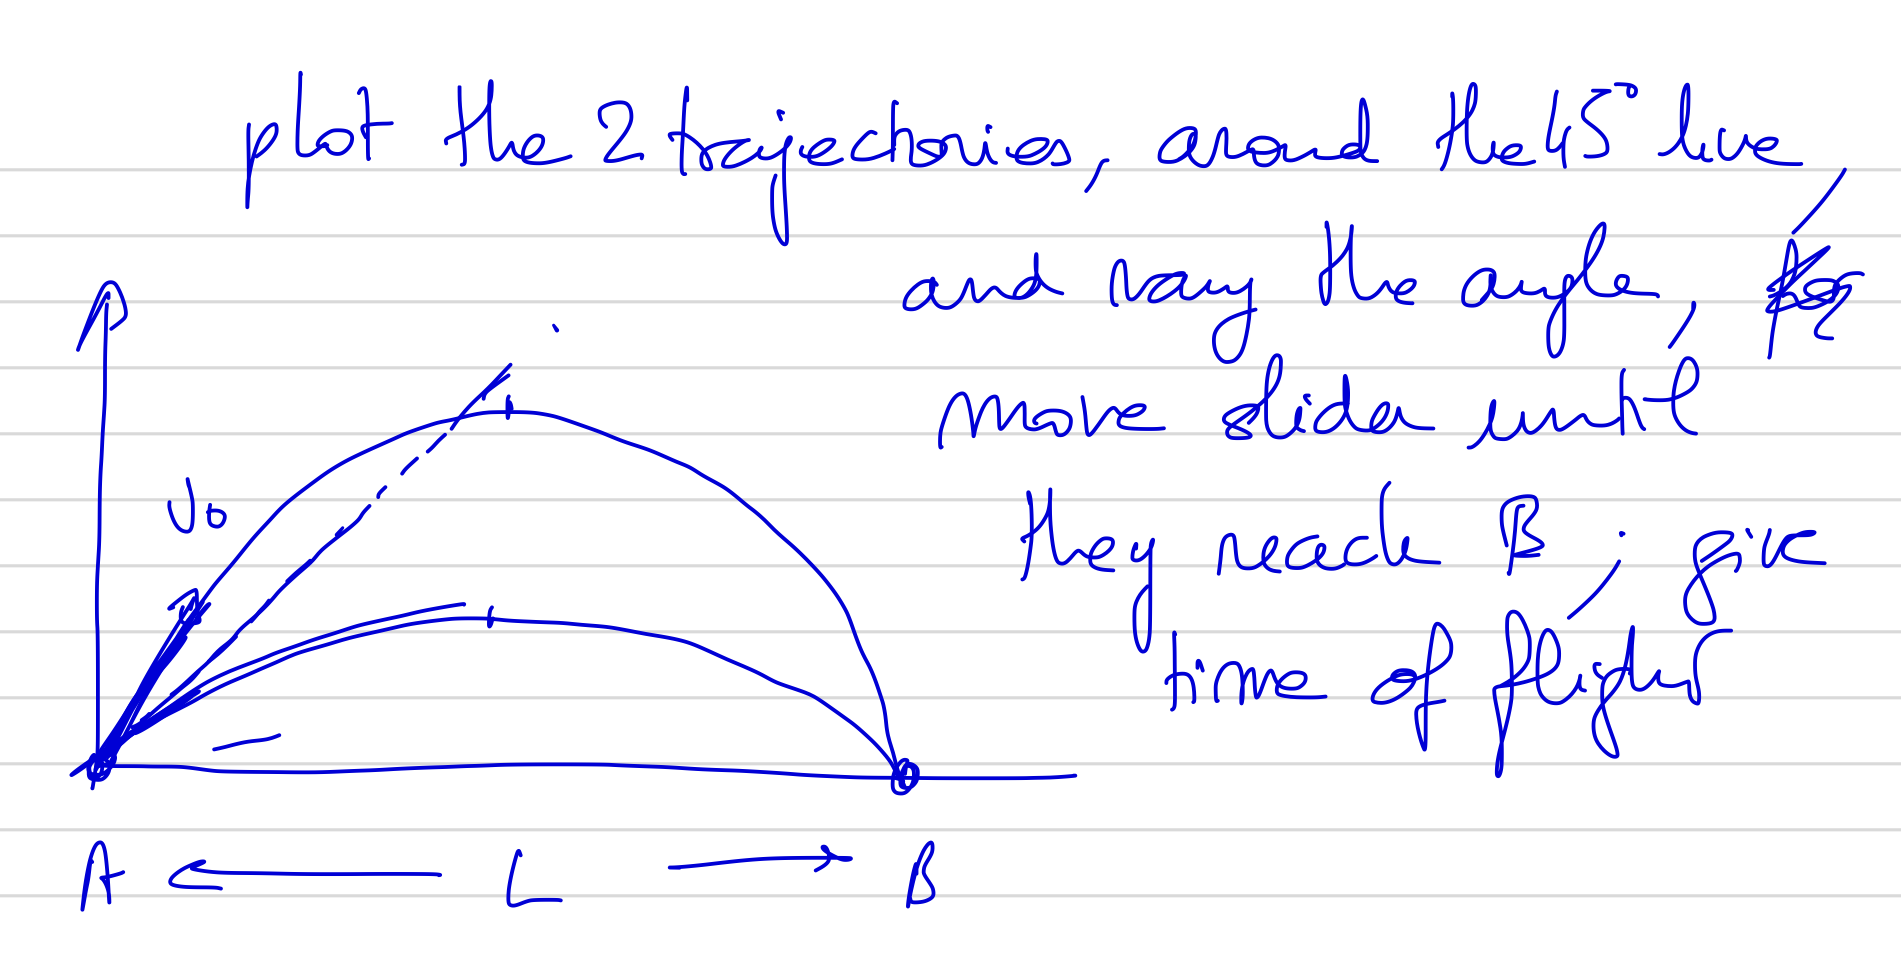

In [2]:
from IPython.display import Image
Image("boules_de_neige.png")

## Solution:

Les équations du mouvement sont:
\begin{align*}
\vec a &=
\begin{pmatrix}
0 \\ -g 
\end{pmatrix}&
\vec v &=
\begin{pmatrix}
v_0\cos\alpha \\ -gt+v_0\sin\alpha
\end{pmatrix}&
\vec r &=
\begin{pmatrix}
v_0\cos\alpha \,t\\ -\frac{1}{2}gt^2+(v_0\sin\alpha)t
\end{pmatrix}
\end{align*}
Les équations du mouvement au point $L$ donnent:
$$
\left\{
\begin{array}{l}
L=v_0\cos\alpha \,t_f\\ 0=- \frac{1}{2}gt_f^2+v_0\sin\alpha\,t_f\\
\end{array}
\right.
$$


In [3]:
g = 9.81 # gravité



## Trajectoire en fonction de la distance et le la vitesse initiale

In [4]:
# Définition des paramètres initiaux
v_0_ini = 20              # Vitesse initiale en m/s
alpha_ini = np.pi*45/180  # 45deg en radian
L_0 = 30                  # Distance initiale en m

# On calcule les deux angles
alpha_1 = np.arcsin((g*L_0)/(v_0_ini**2))/2
alpha_2 = -(np.arcsin((g*L_0)/(v_0_ini**2))-np.pi)/2   
alpha_high = np.max([alpha_1, alpha_2])
alpha_low = np.min([alpha_1, alpha_2])

# On calcul le temps de vol pour les deux boules de neiges
tf1 = L_0/(np.cos(alpha_high)*v_0_ini)
tf2 = L_0/(np.cos(alpha_low)*v_0_ini)
t1 = np.linspace(0,tf1,1000)
t2 = np.linspace(0,tf2,1000)

# On créé les tableaux contenant les trajectoires: position en x et y pour chaque t
x_1 = v_0_ini*np.cos(alpha_high)*t1
y_1 = -0.5 *g*t1**2 + v_0_ini*np.sin(alpha_high)*t1
x_2 = v_0_ini*np.cos(alpha_low)*t2
y_2 = -0.5 *g*t2**2 + v_0_ini*np.sin(alpha_low)*t2

# Initialisation de la figure et de ses axes
p = figure(title="Trajectoire du projectile", plot_height=360, plot_width=720,\
           y_range=(0,np.max([y_1])+20), x_range=(0,L_0+100), 
           background_fill_color='#ffffff')
p.xaxis.axis_label = 'x (m)'
p.yaxis.axis_label = 'y (m)'

# Première trajectoire
r_1 = p.line(x_1, y_1, color="#1118cc", line_width=4.5, alpha=0.8, legend='Première boule de neige')

# Seconde trajectoire 
r_2 = p.line(x_2, y_2, color="#8778cc", line_width=4.5, alpha=0.8, legend='Deuxième boule de neige')


# Flèche indiquant la vitesse initiale
arrow = Arrow(end=OpenHead(line_color="firebrick", ),
                   x_start=0, y_start=0, x_end=10, y_end=10,)
p.add_layout(arrow)

def update_length(v_0, L):
    
    # On recalcule les angles, trajectoires et temps de vol en fonction des nouveaux paramètres
    alpha_1 = np.arcsin((g*L)/(v_0**2))/2
    alpha_2 = -(np.arcsin((g*L)/(v_0**2))-np.pi)/2
    alpha_high = np.max([alpha_1, alpha_2])
    alpha_low = np.min([alpha_1, alpha_2])
    
    tf1 = L/(np.cos(alpha_high)*v_0)
    tf2 = L/(np.cos(alpha_low)*v_0)
    t1 = np.linspace(0,tf1,1000)
    t2 = np.linspace(0,tf2,1000)

   
    r_1.data_source.data['x'] = v_0*np.cos(alpha_high)*t1
    r_1.data_source.data['y'] = -0.5 *g*t1**2 + v_0*np.sin(alpha_high)*t1
    r_2.data_source.data['x'] = v_0*np.cos(alpha_low)*t2
    r_2.data_source.data['y'] = -0.5 *g*t2**2 + v_0*np.sin(alpha_low)*t2
            
    arrow.x_end = v_0*np.cos(alpha_ini)
    arrow.y_end = v_0*np.sin(alpha_ini)
    
    print('Time of flight first trajectory: {:02.2f} s'.format(tf1))
    print('Time of flight second trajectory: {:02.2f} s'.format(tf2))
    push_notebook()  
    
show(p, notebook_handle=True)
interact(update_length, \
         v_0=widgets.FloatSlider(min=0,max=100,step=0.1,value=20, description='$v_0$ :'), \
        L=widgets.FloatSlider(min=0,max=100,step=0.1,value=30, description='Distance recherchée:'))

interactive(children=(FloatSlider(value=20.0, description='$v_0$ :'), FloatSlider(value=30.0, description='Dis…

<function __main__.update_length(v_0, L)>

## Trajectoire en fonction de l'angle et le la vitesse initiale

In [13]:
# On répète 
L_ini = 30 
v_0_ini = 20
alpha_1 = 30 * np.pi/180
alpha_2 = 60 * np.pi/180
    
alpha_high = np.max([alpha_1, alpha_2])
alpha_low = np.min([alpha_1, alpha_2])

L = np.sin(2*alpha_1)*v_0_ini**2/g
    
tf1 = L/(np.cos(alpha_high)*v_0_ini)
tf2 = L/(np.cos(alpha_low)*v_0_ini)

t1 = np.linspace(0,tf1,1000)
t2 = np.linspace(0,tf2,1000)

x_1 = v_0_ini*np.cos(alpha_high)*t1
y_1 = -0.5 *g*t1**2 + v_0_ini*np.sin(alpha_high)*t1

x_2 = v_0_ini*np.cos(alpha_low)*t2
y_2 = -0.5 *g*t2**2 + v_0_ini*np.sin(alpha_low)*t2

f = figure(title="Trajectoire du projectile", plot_height=360, plot_width=720, y_range=(0,np.max([y_1])+20), x_range=(0,L_ini+100), 
           background_fill_color='#ffffff')

# Première trajectoire
r_1 = f.line(x_1, y_1, color="#1118cc", line_width=4.5, alpha=0.8, legend='Première boule de neige')

# Seconde trajectoire 
r_2 = f.line(x_2, y_2, color="#8778cc", line_width=4.5, alpha=0.8, legend='Deuxième boule de neige')

o = f.circle([L_ini], [0], size=20, color="red", alpha=0.5)

f.xaxis.axis_label = 'x (m)'
f.yaxis.axis_label = 'y (m)'

arro = Arrow(end=OpenHead(line_color="firebrick", ),
                   x_start=0, y_start=0, x_end=10, y_end=10)
f.add_layout(arro)

L = np.sin(2*alpha_1)*v_0_ini**2/g
tf1 = L/(np.cos(alpha_1)*v_0_ini)
tf2 = L/(np.cos(alpha_2)*v_0_ini)
    
# tf1_label = Label(x=0, y=220, x_units='screen', y_units='screen', render_mode = 'css',
#                 text='Time of flight first trajectory: {:02.2f} s'.format(tf1),border_line_color='black', border_line_alpha=1.0)
# tf2_label = Label(x=0, y=190, x_units='screen', y_units='screen', render_mode = 'css',
#                text='Time of flight second trajectory: {:02.2f} s'.format(tf2),border_line_color='black', border_line_alpha=1.0)

#f.add_layout(tf1_label)
#f.add_layout(tf2_label)


def update_length(v_0, angle, objectif_distance):
    alpha_1 = (45 + angle) * np.pi/180
    alpha_2 = (45 - angle) * np.pi/180
    
    alpha_high = np.max([alpha_1, alpha_2])
    alpha_low = np.min([alpha_1, alpha_2])
    
    L = np.sin(2*alpha_1)*v_0**2/g
    
    tf1 = L/(np.cos(alpha_1)*v_0)
    tf2 = L/(np.cos(alpha_2)*v_0)
    
    t1 = np.linspace(0,tf1,1000)
    t2 = np.linspace(0,tf2,1000)

   
    r_1.data_source.data['x'] = v_0*np.cos(alpha_high)*t1
    r_1.data_source.data['y'] = -0.5 *g*t1**2 + v_0*np.sin(alpha_high)*t1

    r_2.data_source.data['x'] = v_0*np.cos(alpha_low)*t2
    r_2.data_source.data['y'] = -0.5 *g*t2**2 + v_0*np.sin(alpha_low)*t2
    
        
    o.data_source.data['x'] = [objectif_distance]
    
    arro.x_end = v_0*np.cos(alpha_ini)
    arro.y_end = v_0*np.sin(alpha_ini)
    arro.x_start = 0
    arro.y_start = 0
    
   
    #tf1_label.text = 'Time of flight first trajectory: {:02.2f} s'.format(tf1)
    #tf2_label.text = 'Time of flight second trajectory: {:02.2f} s'.format(tf2)
    print('Time of flight first trajectory: {:02.2f} s'.format(tf1))
    print('Time of flight second trajectory: {:02.2f} s'.format(tf2))

    push_notebook()  
    
show(f, notebook_handle=True)
interact(update_length, \
         v_0=widgets.FloatSlider(min=0,max=100,step=0.1,value=20, description='$v_0$:'), \
        angle=widgets.FloatSlider(min=0,max=45,step=0.01,value=5, description='Angle:'),\
        objectif_distance = widgets.FloatSlider(min=0,max=100,step=0.1,value=5, description='Objectif:') )

interactive(children=(FloatSlider(value=20.0, description='$v_0$:'), FloatSlider(value=5.0, description='Angle…

<function __main__.update_length(v_0, angle, objectif_distance)>